# clustering

because ultimately we're trying to pick out color clusters, right?

In [315]:
from PIL import Image
import numpy as np
import pandas as pd

In [316]:
sunset = Image.open('./data/training/sunset_1.jpg')
sampled_image = np.array(sunset.resize((100, 75))).reshape((7500, 3))

In [317]:
from sklearn.cluster import DBSCAN, OPTICS

In [318]:
from matplotlib import pyplot as plt

In [319]:
sampled_image.shape

(7500, 3)

### DBSCAN and OPTICS

i do both together because they have the same interface

In [320]:
with np.errstate(divide='ignore'):
    op = OPTICS(min_samples=20).fit(sampled_image)
    db = DBSCAN(min_samples=5, eps=.25).fit(sampled_image)

In [321]:
op_labels = op.labels_
db_labels = db.labels_
n_op_clusters = len(np.unique(op_labels))
n_db_clusters = len(np.unique(db_labels))

In [322]:
op_unique, op_counts = np.unique(op_labels, return_counts=True)
db_unique, db_counts = np.unique(db_labels, return_counts=True)

In [323]:
op_unique_counts = list(zip(op_counts, op_unique))
db_unique_counts = list(zip(db_counts, db_unique))

In [337]:
print(f'OP: {op_unique_counts[:5]}')
print(f'DB: {db_unique_counts[:5]}')

OP: [(5922, -1), (31, 0), (42, 1), (31, 2), (23, 3)]
DB: [(7467, -1), (6, 0), (5, 1), (6, 2), (5, 3)]


ultimately DBSCAN just puts too many things in the -1 cluster for it to be usable

OPTICS puts a lot in there too but it at least seems like it can be tuned

In [334]:
top_op_labels = [x[1] for x in sorted(op_unique_counts, reverse=True)[0:10]]
top_db_labels = [x[1] for x in sorted(db_unique_counts, reverse=True)[0:10]]

In [325]:
df = pd.DataFrame(sampled_image)
df.columns = ['R', 'G', 'B']
df['OP'] = op_labels
df['DB'] = db_labels

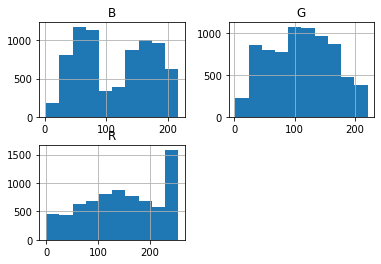

In [326]:
df[['R', 'G', 'B']].hist(bins=10)
plt.show()

In [327]:
op_df = df.groupby(['OP']).filter(lambda x: len(x) < 1000)

In [328]:
op_avg = pd.DataFrame([op_df[op_df.OP == x].describe().loc['mean'] for x in top_op_labels])

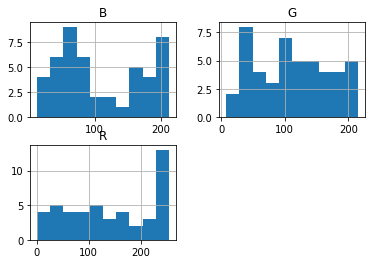

In [329]:
op_avg[['R', 'G', 'B']].hist(bins=10)
plt.show()

interestingly, the average distributions are pretty similar to the original distributions